## Постановка задачи коммивояжера

Дан граф $G = (V, E)$ с весами на ребрах. Требуется найти гамильтонов цикл минимального веса.

В метрической задаче коммивояжера граф G полный, функция весов удовлетворяет неравенству треугольника, т.е. для любых трех вершин $x, y, z$ $w(x, y) \le w(x, z) + w(y, z)$.

## Для стандартной задачи коммивояжера не существует константных алгоритмов приближения, если $P \ne NP$

Предположим, что существует $\alpha$ - приближенный алгоритм для задачи коммивояжера.  

Возьмем прозвольный граф $G$ и присвоим его ребрам вес 1.  

Если между какими-то вершинами нет ребра, то добавим его с весом $\alpha n + 1$.    Получили граф $G^{'}$.   

Тогда если в G существует гамильтонов цикл, то в $G^{'}$ существует гамильтонов цикл веса n.  Если в G нет гамильтонова цикла, то размер минимального цикла в G хотя бы $n - 1 + (\alpha n + 1)$, то есть больше $\alpha n$.

Значит, с помощью $\alpha$ - приближенного алгоритма можно определить, превосходит ли длина минимального гамильтонова цикла $\alpha n$. Следовательно, можно определить есть ли в G гамильтонов цикл, за полиномиальное время. Тогда $P = NP$.

## Алгоритм, дающий 2 - приближение на основе остовного дерева

1. Построить минимальное остовное дерево $Т$.

2. Продублировать каждое ребро цикла. В полученном графе найти эйлеров цикл $P_T$.

3. Построить гамильтонов цикл $P_H$ из $P_E$ последовательным вычеркиванием посещенных вершин.

### Доказательство

Пусть $W_T$ - веc минимального остовного дерева, $ W_{opt}$ - вес оптимального гамильтонова цикла.

Так как при выкидывании ребра из гамильтонова цикла получается остовное дерево, то $W_T \le W_{opt}$.

При построении гамильтонова цикла новое ребро заменяет какой-то путь в эйлеровом цикле. По неравенству треугольника его вес не больше веса замененного пути. 

Следовательно, длина построенного цикла не превосходит $2 W_T$, а значит не превосходит $2 W_{opt}$.

## Алгоритм, дающий 1.5 - приближение на основе остовного дерева и паросочетания (алгоритм Кристофидеса)

1. Построить минимальное остовное дерево Т.

2. Выделить множество $N(T)$ всех вершин нечетной степени в $Т$ и [найти кратчайшее совершенное паросочетание](http://e-maxx.ru/algo/matching_edmonds#2) $М$ в подграфе $G$ с множеством вершин $N(T)$.

3. Добавить в $T$ ребра из $M$.

4. Найти эйлеров обход $P_E$ в полученном графе.

5. Построить гамильтонов цикл $P_H$ из $P_E$ последовательным вычеркиванием посещенных вершин.

### Доказательство

Пусть $W_T$ - вес минимального остовного дерева, $W_p$ - вес кратчайшего совершенного паросочетания М, $ W_{opt}$ - вес оптимального гамильтонова цикла.

Вес построенного цикла не превосходит $W_T + W_p$.

$W_T \le W_{opt}$, как в предыдущем доказательстве.

Рассмотрим такой гамильтонов цикл С, что вершины нечетной степени будут идти в нем в том порядке, в каком они идут в оптимальном гамильтоновом цикле. Разбив С на множества вершин четной и нечетной степени, мы получим два паросочетания. Вес одного из них не превосходит $ W_{opt} / 2$. Следовательно, $W_p \le W_{opt} / 2$.

Значит, вес построенного цикла не превосходит $ W_{opt} + W_{opt} / 2$ , то есть $1.5 W_{opt}$.

## [Реализация 1.5 приближенного алгоритма](https://github.com/lyaronskaya/TSP-Christofides)

## Данные

Для тестирования алгоритма были использованы [данные](http://www.math.uwaterloo.ca/tsp/world/fi10639.tsp) о 10 639 пунктах Финляндии. 

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

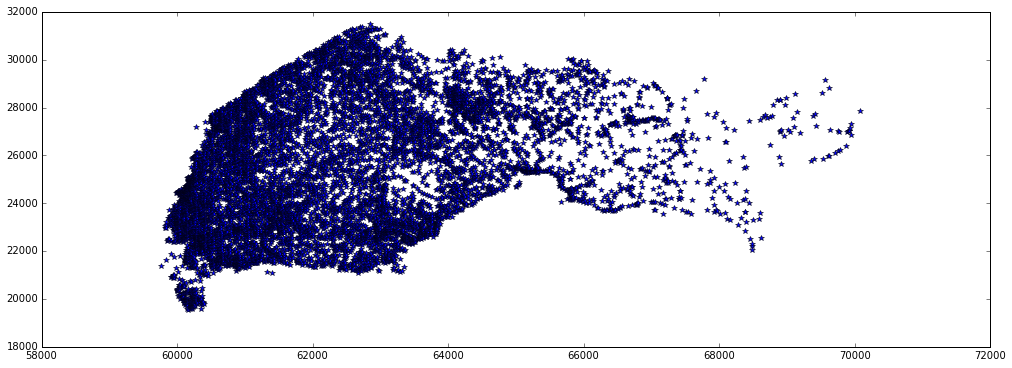

In [31]:
x = []
y = []
with open('coords.txt', 'r') as f:
    data = f.readlines()
    for line in data:
        line = line.strip()
        words = line.split(' ')
        if (len(words) > 2):
            x.append(words[1])
            y.append(words[2])
plt.figure(figsize=(17, 6))
plt.plot(x, y, 'b*')

### Результаты

Длина гамильтонова цикла, полученная алгоритмом Кристофидеса - 732622. Оптимальный путь для использованных данных [520527](http://www.math.uwaterloo.ca/tsp/world/filog.html). Таким образом, получили путь не более чем в 1.5 раза превышающий оптимальный.

Время работы ~ 2 часа.

Полученный путь:

In [53]:
tour = []
with open('result_tour.txt', 'r') as f:
    data = f.readlines()
    for line in data:
        line = line.strip()
        words = line.split(' ')
        tour = tour + words
tour.append(tour[0])
len(tour)

10640

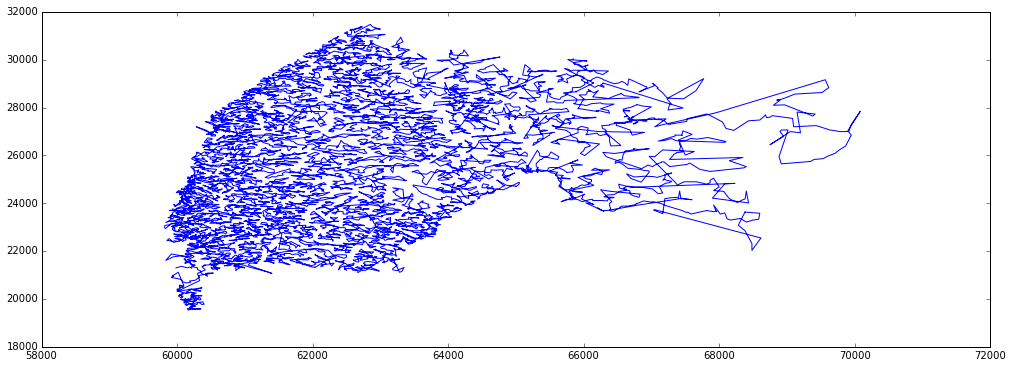

In [41]:
tour_x = [x[int(v)] for v in tour]
tour_y = [y[int(v)] for v in tour]

plt.figure(figsize=(17, 6))
plt.plot(tour_x, tour_y)

Для сравнения - оптимальный путь для данных:

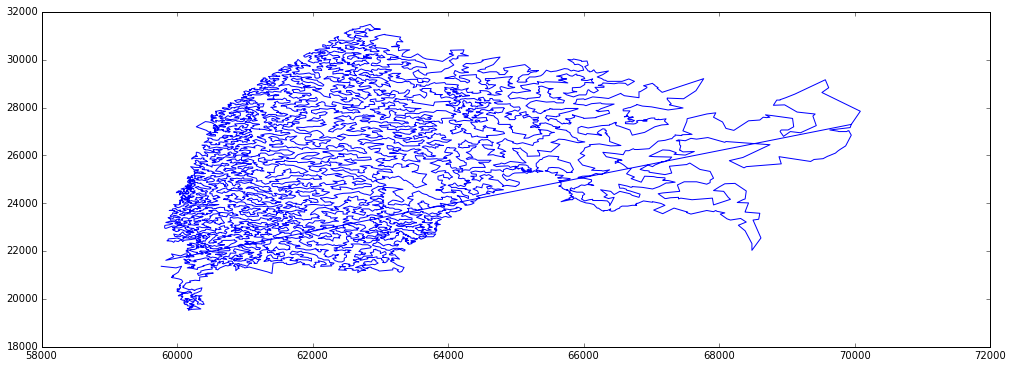

In [57]:
opt_tour = []
with open('fi10639.tour.txt', 'r') as f:
    data = f.readlines()
    for line in data:
        if line.strip() == 'EOF':
            break
        opt_tour.append(int(line))

opt_tour_x = [x[v - 1] for v in opt_tour]
opt_tour_y = [y[v - 1] for v in opt_tour]

plt.figure(figsize=(17, 6))
plt.plot(opt_tour_x, opt_tour_y)